# Project: Investigate a Firearm_background_check_reports


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#question">Research Question1</a></li>
        <li><a href="#question">Research Question2</a></li>
        <li><a href="#question">Research Question3</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction


> #### *Dataset used for this project:*
[FBI Gun Data](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a5623_ncis-and-census-data/ncis-and-census-data.zip) original source on [Github](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md)

>> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer
does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.
-  The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
-  The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.


>**NOTES:**
* *Refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers
* **Multiple (multiple types of firearms selected

>**DISCLAIMERS:** 
* Some states may reflect lower than expected numbers for handgun checks based on varying state laws pertaining to handgun permits Since the permit check is done in place of the NICS check in most of the affected states, the low handgun statistics are often balanced out by a higher number of handgun permit checks.
* These statistics represent the number of firearm background checks initiated through the NICS They do not represent the number of firearms sold Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale

* Dependent Variable: the 'totals' variable in gun data.
* Independent Variables: all the numerical variable in census dataset

<div class="alert alert-success">
<a id='question'></a><b>Questions which we will try to answer here:</b> 

<ol>    
<li><a href="#q1"> What is the gun registrations ratio w.r.t population on July 1, 2016? </li>
<li><a href="#q2"> What is the sum of registered gun in each state over time? </li>
<li><a href="#q3"> What is the overall trend of gun purchases? </li>
</ol>
</div>

> #### **References:**
1.	https://www.fbi.gov/services/cjis/nics
2.  https://pythonbasics.org/seaborn-barplot/
3.  https://www.wired.com/story/guns-in-america-five-charts/

In [1]:
# -*- coding: utf-8 -*-

# Impport all the required package to complete this assignments. 
import numpy as np
import pandas as pd
import datetime
from statistics import mode
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

gun_data = pd.read_excel('gun_data.xlsx')
census_data = pd.read_csv('US_census_data.csv')

In [3]:
gun_data.head(2)

,month,state,permit,permit_recheck,permit_handgun,permit_long_gun,permit_other,permit_multiple,permit_admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [4]:
census_data.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"




### Data Cleaning

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Drop the 'Fact Note' columns as it unnecessary 
census_data.drop(['Fact Note'], axis = 1, inplace = True) 

In [6]:
#census_data=census_data.T
census_data.head(2)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [7]:
# displays a concise summary of the dataframe;
# including the number of non-null values in each column.
gun_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   permit_handgun             12465 non-null  float64
 5   permit_long_gun            12466 non-null  float64
 6   permit_other               5500 non-null   float64
 7   permit_multiple            12485 non-null  int64  
 8   permit_admin               12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [8]:
# displays a concise summary of the dataframe;
# including the number of non-null values in each column.

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

In [9]:
# this returns useful descriptive statistics for each column of data
gun_data.describe()

,permit,permit_recheck,permit_handgun,permit_long_gun,permit_other,permit_multiple,permit_admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [10]:
# this returns useful descriptive statistics for each column of data
census_data.describe()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,65,65,64,64,64,63,64,63,64,64,...,65,64,64,64,63,65,65,64,65,64
top,"Total accommodation and food services sales, 2...","98,540",7.30%,50.30%,50.90%,50.30%,3.30%,0.10%,51.60%,51.10%,...,2.45,0.048,50.40%,2.50%,1.90%,"197,384","$31,762",1.50%,1.60%,7.10%
freq,1,1,2,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [11]:
# Convert string into datatime format in gun_data
gun_data.month = pd.to_datetime(gun_data['month'], errors='coerce')

# Confirm changes
gun_data['month'].dtypes

dtype('<M8[ns]')

In [12]:
#  check if any value is NaN in census_data and in how many columns
census_data.isnull().any().any(), sum(census_data.isnull().any())

(False, 0)

In [13]:
#  check if any value is NaN in gun_data and in how many columns
gun_data.isnull().any().any(), sum(gun_data.isnull().any())

(True, 23)

In [14]:
#Check duplicate values in both dataset.
gun_data.duplicated().sum() , census_data.duplicated().sum()

(0, 0)

In [15]:
# Fill 'O' for all null values
census_data = census_data.fillna(0.0)
gun_data_fillnull = gun_data.fillna(0.0)

In [16]:
#Remove the comma(,), percentage(%), dollars sign($), double quote("") from the census_data
census_data.iloc[:, 1:] = census_data.iloc[:, 1:].apply(lambda col: col.str.replace(',', ''))
census_data.iloc[:, 1:] = census_data.iloc[:, 1:].apply(lambda col: col.str.replace('%', ''))
census_data.iloc[:, 1:] = census_data.iloc[:, 1:].apply(lambda col: col.str.replace('$', ''))
census_data.iloc[:, 1:] = census_data.iloc[:, 1:].apply(lambda col: col.str.replace('"', ''))


In [17]:
# As for census_data, numericial type of data was mispresented as string type, thus first task is to convert them into float
# Skip the first 1 columns as they should be string type, so leave them unchanged.
split_columns = []
for i in census_data.columns[1:]:
    split_columns.append(i)

for col in split_columns:
    census_data[col] = census_data[col].astype(float)


In [18]:
#confirm changes
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            65 non-null     object 
 1   Alabama         65 non-null     float64
 2   Alaska          65 non-null     float64
 3   Arizona         65 non-null     float64
 4   Arkansas        65 non-null     float64
 5   California      65 non-null     float64
 6   Colorado        65 non-null     float64
 7   Connecticut     65 non-null     float64
 8   Delaware        65 non-null     float64
 9   Florida         65 non-null     float64
 10  Georgia         65 non-null     float64
 11  Hawaii          65 non-null     float64
 12  Idaho           65 non-null     float64
 13  Illinois        65 non-null     float64
 14  Indiana         65 non-null     float64
 15  Iowa            65 non-null     float64
 16  Kansas          65 non-null     float64
 17  Kentucky        65 non-null     float

In [19]:
# change the columns to lowercase
census_data.rename(columns = lambda x: x.lower(), inplace = True)
census_data["fact"] = census_data["fact"].str.lower()

gun_data.rename(columns = lambda x: x.lower(), inplace = True)
gun_data["state"] = gun_data["state"].str.lower()

In [20]:
#Transpose in order to join with gun_data in the future
census_data.set_index('fact',inplace=True)
census_data = census_data.T.reset_index()

In [21]:
#Rename index into state before joining 
census_data.rename(columns = {"index": "state"}, inplace =True)

In [22]:
#compare if all state are present in both dataset
census_state = []
for i in census_data['state'].values: 
    census_state.append(i)  
    
gun_state = []
for i in gun_data.groupby('state').sum().index:
    gun_state.append(i)

In [23]:
len(census_state), len(gun_state)

(50, 55)

In [24]:
# Which state are missing?
for s in gun_state:
    if s not in census_state:
         print(s)

district of columbia
guam
mariana islands
puerto rico
virgin islands


#### So, these 5 states need to be excluded later for a consistent analysis
> **Note**: in this step, we only find the issues. The cleaning job is left to the Exploratory Data Analysis on purpose to show a complete exploratory process.

In [25]:
# Save the cleaned census_data to new csv file. 
census_data.to_csv('cleaned_census_data.csv', index=False)
gun_data.to_csv('cleaned_gun_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### What is the gun registrations ratio w.r.t population on July 1, 2016?

In [26]:
gun_state_sum = gun_data.groupby('state').sum()

In [27]:
gun_state_totals = gun_state_sum['totals'] 

In [28]:
gun_state_totals.head()

state
alabama        6706079
alaska         1137643
arizona        4425714
arkansas       3752633
california    19014063
Name: totals, dtype: int64

In [29]:
gun_state_totals = gun_state_totals.drop(
    ['district of columbia',
     'guam',
     'mariana islands',
     'puerto rico',
     'virgin islands'])

In [30]:
# Save the data in csv file for future use. 
gun_state_totals.to_csv('gun_statewise.csv')

In [31]:
# Fetch the state and July 1, 2016 population data from census_data
census_population_2016 = census_data.loc[:, ('state','population estimates, july 1, 2016,  (v2016)')]
# census_population_2016.set_index('state', inplace=True)

In [32]:
#Rename 'population estimates, july 1, 2016,  (v2016)' into population_july_2016 before joining 
census_population_2016.rename(columns = {"population estimates, july 1, 2016,  (v2016)": "population_july_2016"}, inplace =True)

In [33]:
gun_state_totals.head()

state
alabama        6706079
alaska         1137643
arizona        4425714
arkansas       3752633
california    19014063
Name: totals, dtype: int64

In [34]:
census_population_2016.head()

fact,state,population_july_2016
0,alabama,4863300.0
1,alaska,741894.0
2,arizona,6931071.0
3,arkansas,2988248.0
4,california,39250017.0


In [35]:
# Save the data in csv file for future use.
census_population_2016.to_csv('2016_pop.csv', index=False)

In [36]:
#Load the fresh edited dataset
g = pd.read_csv('gun_statewise.csv')
c = pd.read_csv('2016_pop.csv')


In [37]:
# Merge both the dataset 
gun_population_2016 = pd.merge(c, g, on='state', how='left').dropna()

In [38]:
#Change the datatype of totals to float to match with population datatype.
gun_population_2016['totals']= gun_population_2016['totals'].astype(float)

In [39]:
#Rename 'totals' to gun_registration
gun_population_2016.rename(columns = {"totals": "gun_registration"}, inplace =True)

In [40]:
gun_population_2016.head()

,state,population_july_2016,gun_registration
0,alabama,4863300.0,6706079.0
1,alaska,741894.0,1137643.0
2,arizona,6931071.0,4425714.0
3,arkansas,2988248.0,3752633.0
4,california,39250017.0,19014063.0


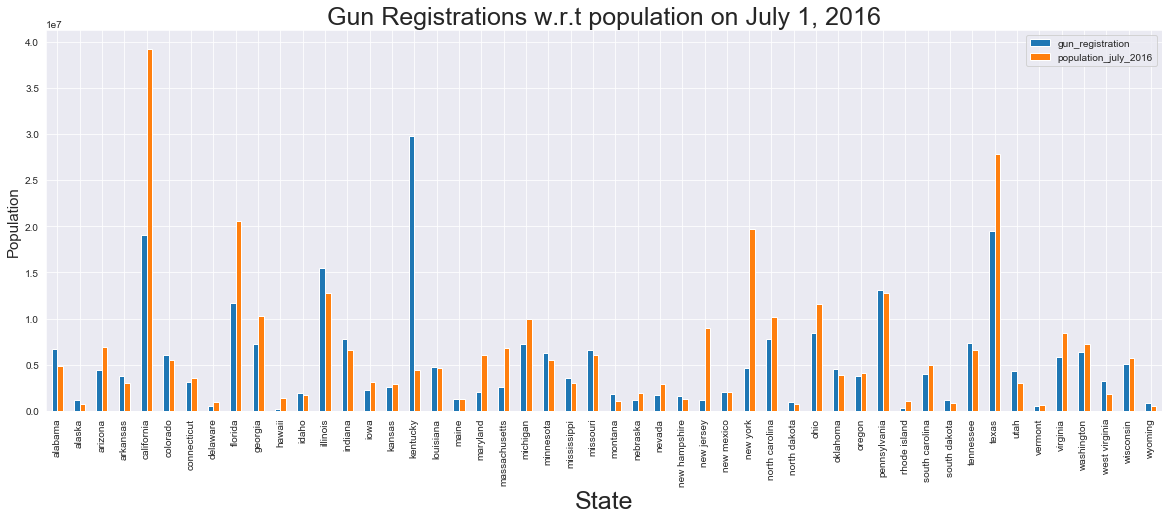

In [41]:
# Plot the graph
ax = gun_population_2016.plot(kind='bar', x= 'state', y =['gun_registration', 'population_july_2016'], figsize=(20,7));
ax.set_title('Gun Registrations w.r.t population on July 1, 2016', fontsize=25)
ax.set_xlabel('State', fontsize=25)
ax.set_ylabel('Population', fontsize=15);
plt.savefig('gun_registration vs population_2016.png')

###  Another stacked bar plot of gun registration w.r.t July 2016, Population

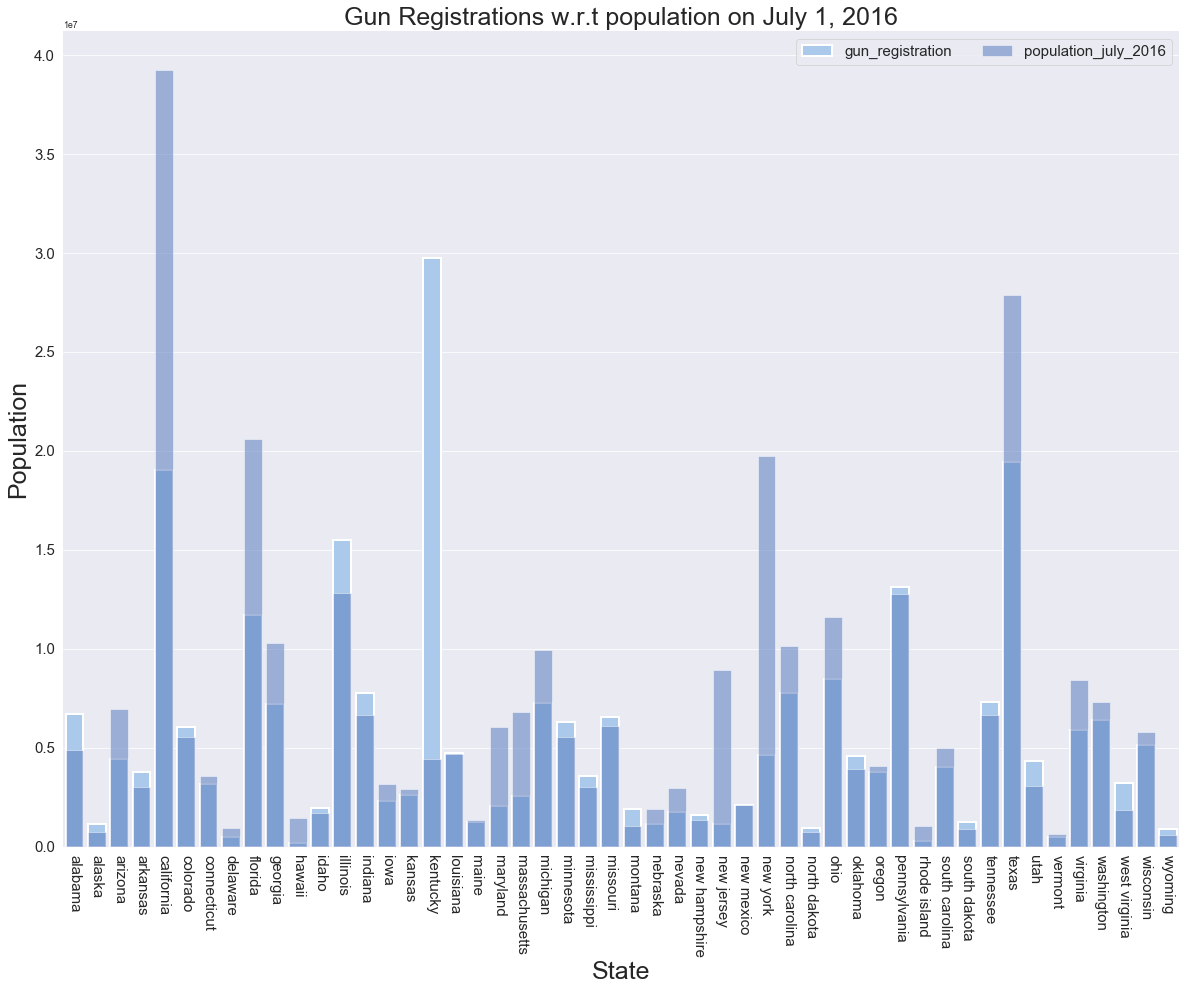

In [42]:
# Plot the graph

sns.set_context('paper')

f, ax = plt.subplots(figsize = (20,15))
sns.set_color_codes('pastel')
#Plot gun_registration columns
sns.barplot(x = 'state', y = 'gun_registration', data = gun_population_2016,
            label = 'gun_registration', color = 'b', edgecolor = 'w', alpha = 1.0, linewidth = 2) 
sns.set_color_codes('muted')
#Plot population_july_2016 columns
sns.barplot(x = 'state', y = 'population_july_2016', data = gun_population_2016,
            label = 'population_july_2016', color = 'b', edgecolor = 'w', alpha=0.55)
#Legend position
ax.legend(ncol = 5, loc = 'upper right', fontsize = 15)
sns.despine(left = True, bottom = True)
ax.set_title('Gun Registrations w.r.t population on July 1, 2016', fontsize=25)
ax.set_xlabel('State', fontsize=25)
ax.set_ylabel('Population', fontsize=25)
plt.xticks(rotation=270, size = 15) #Set the X- axis text rotation and size
plt.yticks(rotation=0, size = 15)
plt.savefig('gun_pop_2016.png')
plt.show()

> *California, Kentucky, Illinois, Texas* these are the states where maximum guns were registered till July 2016.

<a id='q2'></a>
### What is the sum of registered gun in each state over time?

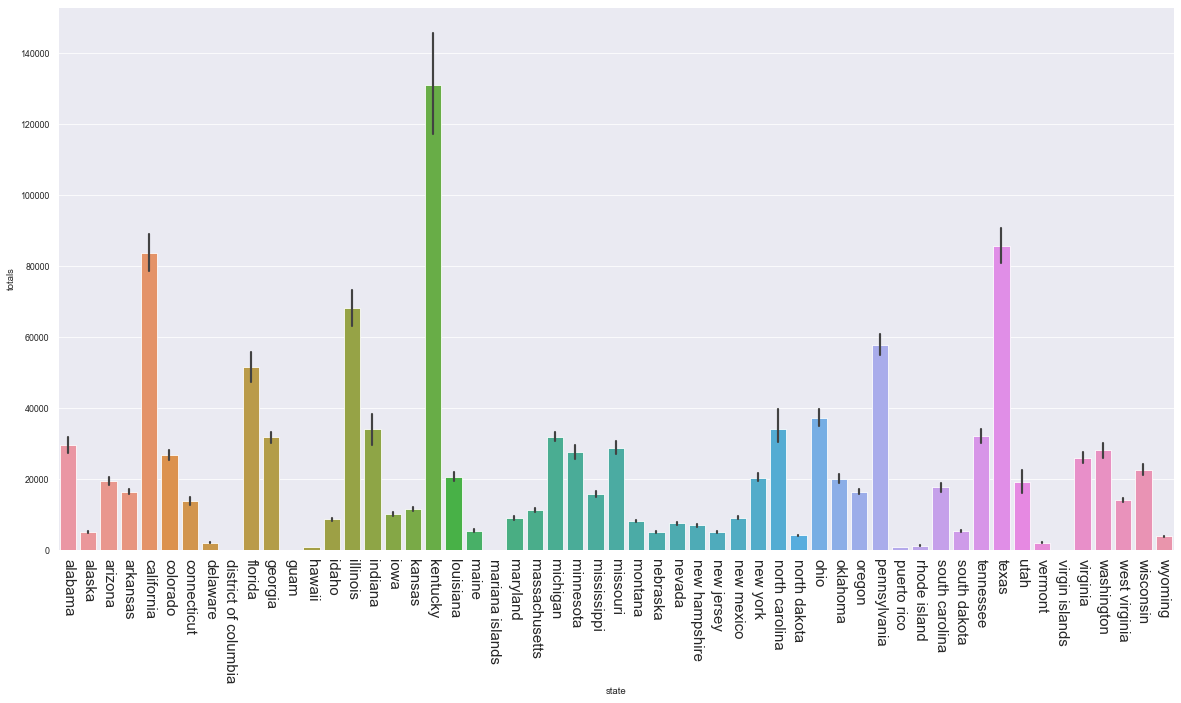

In [43]:
# Plot the graph

plt.subplots(figsize=(20,10))
plt.xticks(rotation=270, size = 15) #Set the X- axis text rotation and size
ax.legend(ncol = 5, loc = 'upper right', fontsize = 15)
ax.set_xlabel('State', fontsize=25)
ax.set_ylabel('Population', fontsize=25)
sns.barplot(x='state', y='totals', data=gun_data);
plt.savefig('gun_statewise.png')

>*  So, Kentucky has the highest number of guns registration over the year. 

<a id='q3'></a>
### What is the overall trend of gun purchases?

* Relationship between the month w.r.t totals and their sum will give us the gun purchases trend.


In [44]:
# Total gun registration by month over the year 
all_df_gun_totals = gun_data[['month','totals']]
all_df_gun_totals.set_index('month', inplace = True)

all_df_gun_totals = all_df_gun_totals[::-1]

gun_totals_groupby_month = all_df_gun_totals.groupby('month').sum()

gun_totals_groupby_month.head()

,totals
month,
1998-11-01,21176
1998-12-01,870722
1999-01-01,585974
1999-02-01,690215
1999-03-01,741687


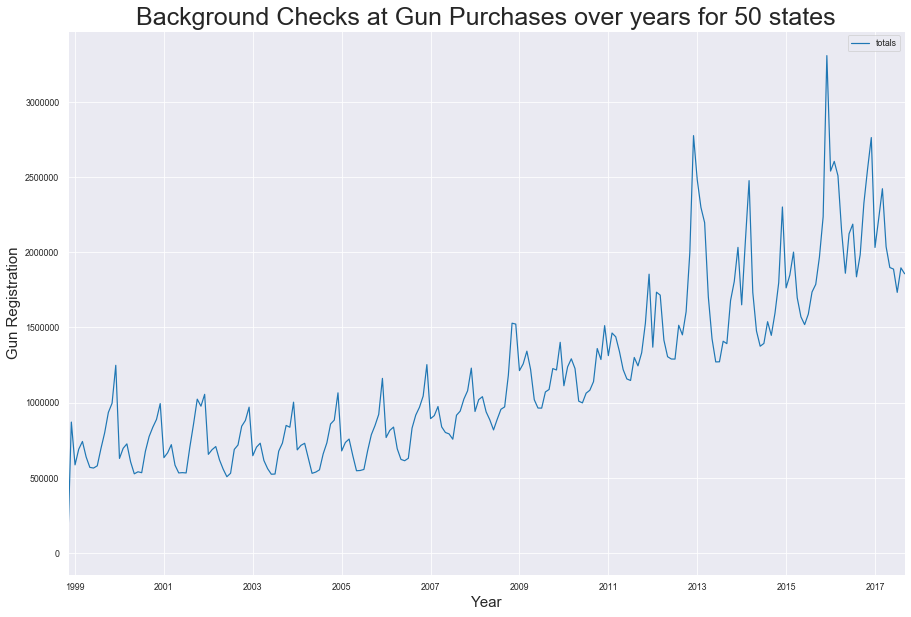

In [45]:
# Plot the graph

ax = gun_totals_groupby_month.plot(figsize=(15,10))
ax.set_title('Background Checks at Gun Purchases over years for 50 states', fontsize=25)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Gun Registration', fontsize=15);
plt.savefig('gun_registration_yearwise.png')

> * From the graph, we can say that the overall gun registrations has increased significantly over the years. 

<a id='conclusions'></a>
## Conclusions



With the exploration and analysis performed above, we can answer the questions raised at the begginning of this notebook, with limitation :
> *In current study, a good amount of profound analysis has been carried out. Prior to each step, deailed instructions was given and interpretions was also provided afterwards. The dataset included 2 tables, but they have to be loaded by different measures. The data was ranging from 1998 to 2017, which consisted of detailed information of registered gun. Based on such substantial data, the analysis would be more reliable as opposed to small scale analysis.

> * From <b>`Background Checks at Gun Purchases over years for 50 states`</b> one can say that Why ther is increase in the number of murders and crimes in US. 

<a id='limitations'></a>
## Limitations

> The limitations of current study were obvious as well, data was seperated into two tables which could affect the process  of analysis. On the other hand, the population estimation were only recorded for 2010 and 2016, which limit some analysis to a small range, same for many other parameters, such as "Foreign born persons, percent", "Veterans, 2011-2015", etc.


> The dataset of census has a few inconsistant data, which are letters instead of numeric-like data and have some special meanings. 

>*For example:*

In [46]:
# let's load the original census data:
df_census_temp = pd.read_csv('U.S. Census Data.csv')
df_census_temp.iloc[42].head(15)

Fact           Total manufacturers shipments, 2012 ($1,000)
Fact Note                                               (c)
Alabama                                         124,809,759
Alaska                                                    D
Arizona                                          51,243,473
Arkansas                                         62,712,925
California                                      512,303,164
Colorado                                         50,447,098
Connecticut                                      55,160,095
Delaware                                         22,597,384
Florida                                          96,924,106
Georgia                                         155,836,792
Hawaii                                                    D
Idaho                                            20,201,432
Illinois                                        281,037,755
Name: 42, dtype: object

> * For the states of Alaska and Hawaii, the data points are 'D', which means 'Suppressed to avoid disclosure of confidential information!'. This information is provided at the end of the original csv data table.*

> * we changed this kind of information into zero.